In [38]:
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np

In [2]:
ivt = pd.read_csv("Aug 5/raw/f1f2_IVT.csv")
old = pd.read_csv("Aug 5/raw/Trizol_OLD_8K_070120_GL.csv")

In [4]:
print(old)

                                   read_id  read_id_number  10  11  12  13  \
0     e92bf281-8083-4447-831e-9829eebeb364               0 NaN NaN NaN NaN   
1     904ff047-3522-4d35-a4f3-9139c9687c50               1 NaN NaN NaN NaN   
2     82a34ef1-4e33-4f03-ae06-c0a920b4f65a               2 NaN NaN NaN NaN   
3     65ae0f91-2056-4cff-b0ab-ad6ee2c2affb               3 NaN NaN NaN NaN   
4     54a2c40a-f1a1-45f0-8ce7-ff3cb9ace140               4 NaN NaN NaN NaN   
5     93b53773-4a9b-41cb-9f03-85f006bff32c               5 NaN NaN NaN NaN   
6     00676bde-4b93-45bb-a850-c333e08c9927               6 NaN NaN NaN NaN   
7     27bc4f8d-fdbb-4559-9b67-b669d90fb9a8               7 NaN NaN NaN NaN   
8     5a9c433f-4241-4f14-ac24-b641d502eedc               8 NaN NaN NaN NaN   
9     45ec4492-8cc1-47cb-8237-4ca56902dda4               9 NaN NaN NaN NaN   
10    4cbbd5c6-b007-4826-900f-05969a773e63              10 NaN NaN NaN NaN   
11    beb0ce55-a932-40da-905c-6b9c764cc18a              11 NaN N

In [7]:
plt.figure(figsize=(40, 30))


<Figure size 2880x2160 with 0 Axes>

<Figure size 2880x2160 with 0 Axes>

In [ ]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

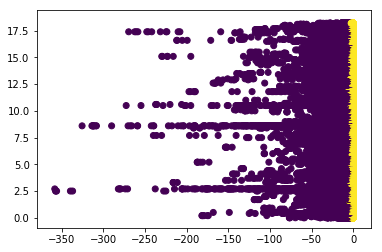

In [4]:


for eps in np.arange(0.05,0.15,0.01):
    for min_samples in range(400, 1001, 100):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        # time = df.shape[0]
        time = 1
        for i in range(2, 3):
            p_val = df.loc[i][2:]
            p_val = np.asarray(p_val)
            p_val = p_val[np.logical_not(np.isnan(p_val))]
            p_val = np.log(p_val)
            y_db = db.fit_predict(p_val.reshape(-1, 1))
            
            threshold = np.max(p_val[y_db == -1])
            n_clusters = len(set(db.labels_))
            if n_clusters == 2 and threshold < -0.6 and threshold > -0.7:
                print(threshold, eps, min_samples, n_clusters)
            
            
            
            # plt.scatter(p_val, [i / 10] * len(p_val), c=y_db)

        # plt.show()

-0.6097926068663433 0.060000000000000005 400 2
-0.6908370290160135 0.07 400 2
-0.6045266466247541 0.07 500 2
-0.6627407822896186 0.08000000000000002 500 2
-0.6515890225145627 0.09000000000000001 600 2
-0.6908370290160135 0.1 600 2
-0.6446326429434506 0.1 700 2
-0.6847878017287745 0.11000000000000001 700 2
-0.6356210689957579 0.11000000000000001 800 2
-0.6787925352318327 0.12000000000000001 800 2
-0.6188965091596738 0.12000000000000001 900 2
-0.6686318832011855 0.13 900 2
-0.6084144837912494 0.13 1000 2
-0.6627407822896186 0.14 1000 2


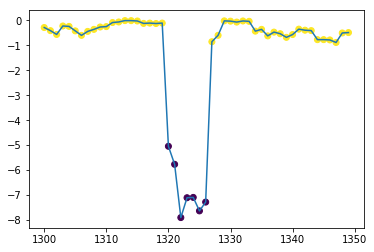

In [67]:
df = ivt

db = DBSCAN(eps=0.5, min_samples=500)
# time = df.shape[0]
time = 1
for i in range(1, 2):
    p_val = df.loc[70][2:]
    
    p_val = p_val[np.logical_not(pd.isnull(p_val))]
    p_val = pd.to_numeric(p_val, errors='coerce')
    p_val = np.asarray(p_val)
    p_val = np.log(p_val)
    y_db = db.fit_predict(p_val.reshape(-1, 1))

    threshold = np.max(p_val[y_db == -1])
    n_clusters = len(set(db.labels_))

    plt.scatter(range(1300, 1350), p_val[1300:1350], c=y_db[1300:1350])
    plt.plot(range(1300, 1350), p_val[1300:1350])
    # plt.scatter(range(0, len(p_val)), p_val, c=y_db)

plt.show()

In [39]:
db = DBSCAN(eps=0.08, min_samples=500)
for i in range(0, df.shape[0]):
            p_val = df.loc[i][2:]
            p_val = np.asarray(p_val)
            p_val = p_val[np.logical_not(pd.isnull(p_val))]
            p_val = np.log(p_val)
            y_db = db.fit_predict(p_val.reshape(-1, 1))
            threshold = np.max(p_val[y_db == -1])
            n_clusters = len(set(db.labels_))
            plt.scatter(p_val, [i / 10] * len(p_val), c=y_db)
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'log'

In [23]:
type(p_val[1])

numpy.float64

In [24]:
type(np.nan)

float

In [35]:
pd.isnull(p_val)

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
type(np)

module